In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree

%matplotlib inline

In [2]:
raisin_data = pd.read_csv("Raisin_Dataset.csv")
print(raisin_data.head())

    Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0  87524       442.246011       253.291155      0.819738       90546   
1  75166       406.690687       243.032436      0.801805       78789   
2  90856       442.267048       266.328318      0.798354       93717   
3  45928       286.540559       208.760042      0.684989       47336   
4  79408       352.190770       290.827533      0.564011       81463   

     Extent  Perimeter    Class  
0  0.758651   1184.040  Kecimen  
1  0.684130   1121.786  Kecimen  
2  0.637613   1208.575  Kecimen  
3  0.699599    844.162  Kecimen  
4  0.792772   1073.251  Kecimen  


Проанализируйте исходные данные, при необходимости заполните пропуски или удалить не важную информацию. Категориальные признаки замените на числовые

In [3]:
print(raisin_data.isnull().sum())

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64


In [4]:
label_encoder = LabelEncoder()
raisin_data['Class'] = label_encoder.fit_transform(raisin_data['Class'])
print(raisin_data)

      Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0    87524       442.246011       253.291155      0.819738       90546   
1    75166       406.690687       243.032436      0.801805       78789   
2    90856       442.267048       266.328318      0.798354       93717   
3    45928       286.540559       208.760042      0.684989       47336   
4    79408       352.190770       290.827533      0.564011       81463   
..     ...              ...              ...           ...         ...   
895  83248       430.077308       247.838695      0.817263       85839   
896  87350       440.735698       259.293149      0.808629       90899   
897  99657       431.706981       298.837323      0.721684      106264   
898  93523       476.344094       254.176054      0.845739       97653   
899  85609       512.081774       215.271976      0.907345       89197   

       Extent  Perimeter  Class  
0    0.758651   1184.040      1  
1    0.684130   1121.786      1  
2    0.63

Выделите из данных вектор меток У и матрицу признаков Х.

In [5]:
x = raisin_data.drop('Class', axis=1)
y = raisin_data['Class']

Разделите набор данных на обучающую и тестовую выборки.

In [6]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, random_state=17)
print(x_train.shape, x_valid.shape)
print(y_train.shape, y_valid.shape)

(675, 7) (225, 7)
(675,) (225,)


На обучающей выборке получите модели дерева решений и k-ближайших соседей, рассчитайте точность моделей.

In [7]:
decision_tree = DecisionTreeClassifier(random_state=17)
knn = KNeighborsClassifier()

decision_tree.fit(x_train, y_train)
knn.fit(x_train, y_train)

y_pred_tree = decision_tree.predict(x_valid)
y_pred_knn = knn.predict(x_valid)

In [8]:
accuracy_tree = accuracy_score(y_valid, y_pred_tree)
accuracy_knn = accuracy_score(y_valid, y_pred_knn)

print("Точность модели дерева решений:", accuracy_tree)
print("Точность модели k-ближайших соседей:", accuracy_knn)

Точность модели дерева решений: 0.8044444444444444
Точность модели k-ближайших соседей: 0.7866666666666666


Подберите наилучшие параметры моделей (например, глубину для дерева решений, количество соседей для алгоритма knn)

In [9]:
# Подбор параметров для модели дерева решений
param_grid_tree = {'max_depth': range(1, 11)}
grid_tree = GridSearchCV(decision_tree, param_grid_tree, cv=5)
grid_tree.fit(x_train, y_train)
best_tree = grid_tree.best_estimator_
accuracy_best_tree = accuracy_score(y_valid, best_tree.predict(x_valid))
print("Наилучшие параметры для дерева решений:", grid_tree.best_params_)
print("Точность наилучшей модели дерева решений:", accuracy_best_tree)

# Подбор параметров для модели k-ближайших соседей
param_grid_knn = {'n_neighbors': range(1, 11)}
grid_knn = GridSearchCV(knn, param_grid_knn, cv=5)
grid_knn.fit(x_train, y_train)
best_knn = grid_knn.best_estimator_
accuracy_best_knn = accuracy_score(y_valid, best_knn.predict(x_valid))
print("Наилучшие параметры для k-ближайших соседей:", grid_knn.best_params_)
print("Точность наилучшей модели k-ближайших соседей:", accuracy_best_knn)


Наилучшие параметры для дерева решений: {'max_depth': 2}
Точность наилучшей модели дерева решений: 0.8266666666666667
Наилучшие параметры для k-ближайших соседей: {'n_neighbors': 5}
Точность наилучшей модели k-ближайших соседей: 0.7866666666666666


Рассчитайте матрицу ошибок (confusion matrix) для каждой модели.

In [10]:
# Рассчитываем матрицу ошибок для модели дерева решений
cm_tree = confusion_matrix(y_valid, y_pred_tree)

# Рассчитываем матрицу ошибок для модели k-ближайших соседей
cm_knn = confusion_matrix(y_valid, y_pred_knn)

print("Матрица ошибок для модели дерева решений:")
print(cm_tree)
print("\nМатрица ошибок для модели k-ближайших соседей:")
print(cm_knn)

Матрица ошибок для модели дерева решений:
[[96 27]
 [17 85]]

Матрица ошибок для модели k-ближайших соседей:
[[95 28]
 [20 82]]


Визуализируйте полученную модель дерева решений (при визуализации желательно уменьшить глубину дерева, что бы рисунок был читаемым, или сохранить в отдельный файл)

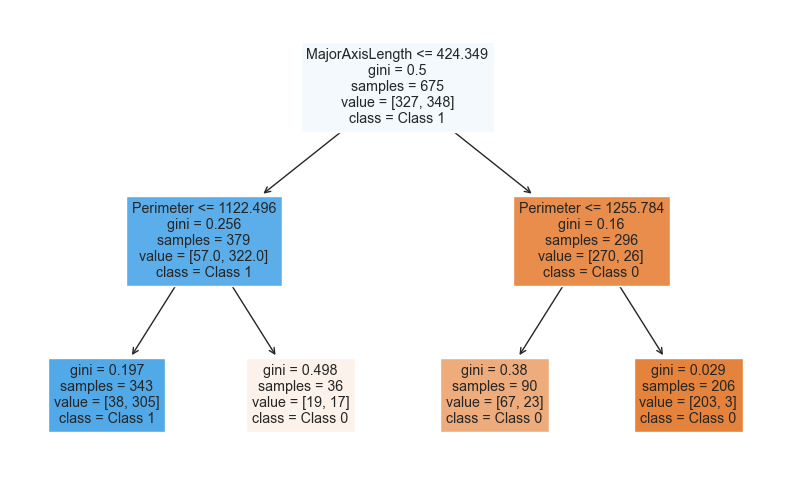

In [11]:
model_tree = DecisionTreeClassifier(max_depth=2)
model_tree.fit(x_train, y_train)

plt.figure(figsize=(10, 6))
plot_tree(model_tree, filled=True, feature_names=x.columns, class_names=['Class 0', 'Class 1'])
plt.show()